In [ ]:
#load the dataset into the notebook kernel
from keras.datasets import mnist
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
%matplotlib inline

#number of training data
print('Training data shape : ', train_X.shape, train_Y.shape)

# number of testing data
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# labels details
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

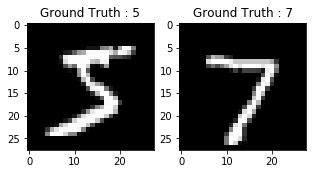

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
#Number of Images(-1) x Height(28) x Width(28) x Channels(1)
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
#convert the variable into tf.float32 value
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
#scale the value to a range between 0 to 1
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
# group the labels into 0/1 by one_hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

#### compile(self, optimizer, loss, metrics=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
#### Arguments

#### optimizer: String (name of optimizer) or optimizer object. See optimizers.
#### loss: String (name of objective function) or objective function. 
#### metrics: List of metrics to be evaluated by the model during training and testing. Typically you will use  metrics=['accuracy']. 
#### sample_weight_mode: If you need to do timestep-wise sample weighting (2D weights), set this to "temporal".
#### weighted_metrics: List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
#### target_tensors: By default, Keras will create a placeholder for the model's target, which will be fed with the target data during training. 
#### **kwargs: When using the Theano/CNTK backends, these arguments are passed into K.function. When using the TensorFlow backend, these arguments are passed into tf.Session.run.

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [15]:
tensorboard = TensorBoard(log_dir="logs/{}")


##### fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

##### x=> input images(train_X)
##### y=> input labels(Train_label)
##### batch size => Number of samples per gradient update. If unspecified, it will default to 32.
##### epochs => Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
##### verbose => 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
##### callbacks => list of call backs
##### validation split => Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.
##### validationdata => data on which validation is performed
##### shuffle => boolean whether to shuffle the training data before an epoch
##### class_weight => mapping class indicies to weight values
##### sample_weight => Optional Numpy array of weights for the training samples, used for weighting the loss function
##### initial epoch => epoch from where the training shoud start
##### steps per epoch => number of steps in a single epoch

In [16]:
train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 56s 1ms/step - loss: 0.1580 - acc: 0.9512 - val_loss: 0.0950 - val_acc: 0.9709
Epoch 2/20
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0461 - acc: 0.9863 - val_loss: 0.0485 - val_acc: 0.9839
Epoch 3/20
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0299 - acc: 0.9904 - val_loss: 0.0361 - val_acc: 0.9898
Epoch 4/20
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0229 - acc: 0.9929 - val_loss: 0.0303 - val_acc: 0.9916
Epoch 5/20
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0191 - acc: 0.9940 - val_loss: 0.0346 - val_acc: 0.9897
Epoch 6/20
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0150 - acc: 0.9949 - val_loss: 0.0327 - val_acc: 0.9900
Epoch 7/20
48000/48000 [==============================] - 71s 1ms/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0363 - val_acc

In [43]:
# computes the loss on the test data 
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 4s 431us/step


In [44]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.018371891271160304
Test accuracy: 0.9941


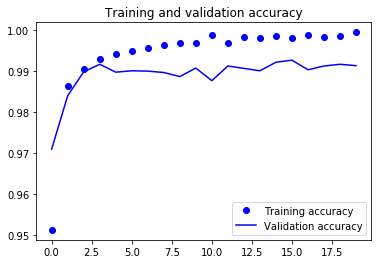

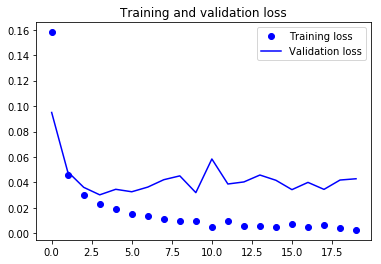

In [45]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
predicted_classes = model.predict(test_X)

In [21]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9912 correct labels


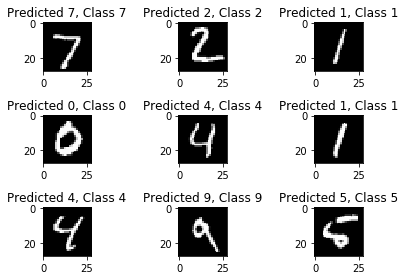

In [22]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 88 incorrect labels


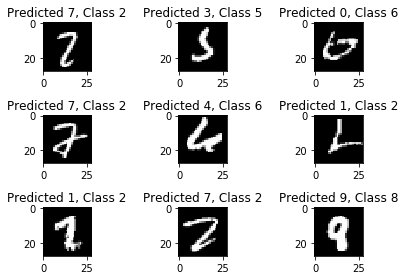

In [23]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [24]:
batch_size = 64
epochs = 20
num_classes = 10

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
tensorboard = TensorBoard(log_dir="logs/{}", write_graph = True, )

In [30]:
train_dropout = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.2773 - acc: 0.9106 - val_loss: 0.0692 - val_acc: 0.9772
Epoch 2/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0836 - acc: 0.9744 - val_loss: 0.0440 - val_acc: 0.9859
Epoch 3/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0620 - acc: 0.9807 - val_loss: 0.0416 - val_acc: 0.9877
Epoch 4/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0525 - acc: 0.9833 - val_loss: 0.0365 - val_acc: 0.9892
Epoch 5/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0456 - acc: 0.9860 - val_loss: 0.0357 - val_acc: 0.9898
Epoch 6/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0415 - acc: 0.9871 - val_loss: 0.0337 - val_acc: 0.9894
Epoch 7/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0364 - acc: 0.9882 - val_loss: 0.0346 - val_acc

In [31]:
model.save("model_dropout.h5py")

In [32]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 4s 435us/step


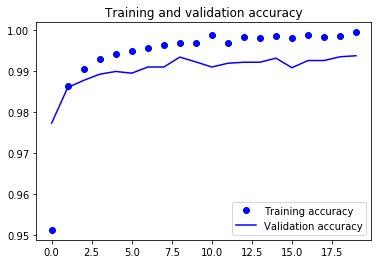

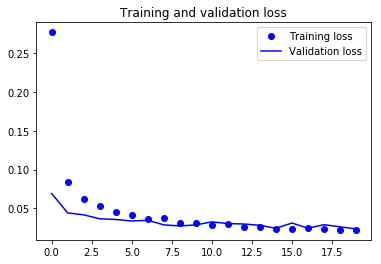

Test accuracy: 0.9941


In [34]:
printaccuracy = train_dropout.history['acc']
val_accuracy = train_dropout.history['val_acc']
loss = train_dropout.history['loss']
val_loss = train_dropout.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [35]:
predicted_classes = model.predict(test_X)

In [36]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9941 correct labels


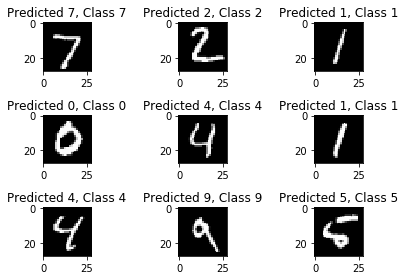

In [37]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 59 incorrect labels


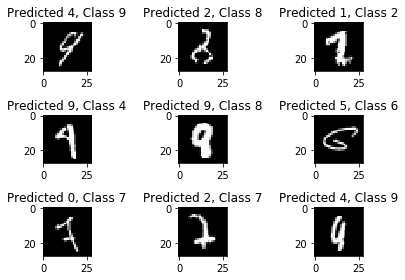

In [38]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()